# Build online clustering algorighm 

## Train model (slower)

In [41]:
import tqdm
import numpy as np
from scipy.spatial.distance import euclidean

import pickle
import matplotlib.pyplot as plt



In [42]:
import numpy as np
import pickle
from scipy.spatial.distance import euclidean

class OnlineClustering:
    def __init__(self, distance_threshold=500):
        """
        Initialize the online clustering algorithm.

        :param distance_threshold: Maximum Euclidean distance for assigning to an existing cluster.
        """
        self.distance_threshold = distance_threshold
        self.clusters = []  # List of cluster centroids (1D arrays)
        self.cluster_assignments = []  # List to track which cluster each image belongs to

    def _flatten_image(self, image):
        """
        Flatten a 64x64x3 image into a 1D vector.

        :param image: Input image of shape (64, 64, 3).
        :return: Flattened image as a 1D vector.
        """
        return image.flatten()

    def process_image(self, image):
        """
        Process a new image and assign it to a cluster.

        :param image: Input image of shape (64, 64, 3).
        :return: The index of the cluster the image is assigned to.
        """
        image_vector = self._flatten_image(image)

        # Compute distances to existing cluster centroids
        if not self.clusters:  # If no clusters exist, create the first one
            self.clusters.append(image_vector)
            self.cluster_assignments.append(0)
            return 0

        # Ensure all centroids are 1D before calculating distances
        distances = [euclidean(image_vector, np.asarray(centroid)) for centroid in self.clusters]

        # Check if the image fits into an existing cluster
        min_distance = min(distances)
        if min_distance <= self.distance_threshold:
            cluster_index = distances.index(min_distance)
        else:
            # Create a new cluster
            cluster_index = len(self.clusters)
            self.clusters.append(image_vector)
            print(f'cluster {cluster_index} created')

        self.cluster_assignments.append(cluster_index)
        return cluster_index



In [37]:

# Load the saved data
data = np.load("../data/small_env_5_5_3actions_1k_low_orient.npz")

# Extract the 'image' key from the data
# Assuming the shape of 'image' is (steps, height, width, channels)
images = data["image"]


# Initialize the clustering model
clustering = OnlineClustering(distance_threshold=500)

# Run clustering on the images
cluster_indices = []
for i in tqdm.tqdm(images, desc='Online Clustering Process'):
    cluster_index = clustering.process_image(i)
    cluster_indices.append(cluster_index)

# Save the clustering model and results
output = {
    'cluster_indices': cluster_indices,
    'clustering_model': clustering
}

with open('clustering_result.pkl', 'wb') as f:
    pickle.dump(output, f)

print("Clustering model and results saved to 'clustering_result.pkl'.")

Online Clustering Process:   8%|██████▊                                                                                 | 78/1000 [00:00<00:01, 771.07it/s]

cluster 1 created
cluster 2 created
cluster 3 created
cluster 4 created
cluster 5 created
cluster 6 created
cluster 7 created
cluster 8 created
cluster 9 created
cluster 10 created
cluster 11 created
cluster 12 created
cluster 13 created
cluster 14 created
cluster 15 created
cluster 16 created
cluster 17 created
cluster 18 created
cluster 19 created
cluster 20 created
cluster 21 created
cluster 22 created
cluster 23 created
cluster 24 created
cluster 25 created
cluster 26 created
cluster 27 created
cluster 28 created
cluster 29 created
cluster 30 created
cluster 31 created
cluster 32 created
cluster 33 created
cluster 34 created
cluster 35 created
cluster 36 created
cluster 37 created
cluster 38 created
cluster 39 created
cluster 40 created
cluster 41 created
cluster 42 created
cluster 43 created
cluster 44 created
cluster 45 created
cluster 46 created
cluster 47 created
cluster 48 created
cluster 49 created
cluster 50 created
cluster 51 created
cluster 52 created
cluster 53 created
cl

Online Clustering Process:  16%|█████████████▌                                                                         | 156/1000 [00:00<00:02, 331.07it/s]

cluster 152 created
cluster 153 created
cluster 154 created
cluster 155 created
cluster 156 created
cluster 157 created
cluster 158 created
cluster 159 created
cluster 160 created
cluster 161 created
cluster 162 created
cluster 163 created
cluster 164 created
cluster 165 created
cluster 166 created
cluster 167 created
cluster 168 created
cluster 169 created
cluster 170 created
cluster 171 created
cluster 172 created
cluster 173 created
cluster 174 created
cluster 175 created
cluster 176 created
cluster 177 created
cluster 178 created
cluster 179 created
cluster 180 created
cluster 181 created
cluster 182 created
cluster 183 created
cluster 184 created
cluster 185 created
cluster 186 created
cluster 187 created
cluster 188 created


Online Clustering Process:  20%|█████████████████▌                                                                     | 202/1000 [00:00<00:03, 240.21it/s]

cluster 189 created
cluster 190 created
cluster 191 created
cluster 192 created
cluster 193 created
cluster 194 created
cluster 195 created
cluster 196 created
cluster 197 created
cluster 198 created
cluster 199 created
cluster 200 created
cluster 201 created
cluster 202 created
cluster 203 created
cluster 204 created
cluster 205 created
cluster 206 created
cluster 207 created
cluster 208 created
cluster 209 created
cluster 210 created
cluster 211 created
cluster 212 created
cluster 213 created
cluster 214 created


Online Clustering Process:  23%|████████████████████▎                                                                  | 234/1000 [00:00<00:03, 206.90it/s]

cluster 215 created
cluster 216 created
cluster 217 created
cluster 218 created
cluster 219 created
cluster 220 created
cluster 221 created
cluster 222 created
cluster 223 created
cluster 224 created
cluster 225 created
cluster 226 created
cluster 227 created
cluster 228 created
cluster 229 created
cluster 230 created
cluster 231 created
cluster 232 created
cluster 233 created
cluster 234 created
cluster 235 created
cluster 236 created
cluster 237 created
cluster 238 created
cluster 239 created
cluster 240 created
cluster 241 created
cluster 242 created


Online Clustering Process:  26%|██████████████████████▌                                                                | 260/1000 [00:01<00:04, 180.48it/s]

cluster 243 created
cluster 244 created
cluster 245 created
cluster 246 created
cluster 247 created
cluster 248 created
cluster 249 created
cluster 250 created
cluster 251 created
cluster 252 created
cluster 253 created
cluster 254 created
cluster 255 created
cluster 256 created
cluster 257 created
cluster 258 created
cluster 259 created
cluster 260 created
cluster 261 created
cluster 262 created


Online Clustering Process:  28%|████████████████████████▍                                                              | 281/1000 [00:01<00:04, 151.45it/s]

cluster 263 created
cluster 264 created
cluster 265 created
cluster 266 created
cluster 267 created
cluster 268 created
cluster 269 created
cluster 270 created
cluster 271 created
cluster 272 created
cluster 273 created
cluster 274 created
cluster 275 created
cluster 276 created
cluster 277 created
cluster 278 created
cluster 279 created
cluster 280 created
cluster 281 created
cluster 282 created
cluster 283 created
cluster 284 created
cluster 285 created


Online Clustering Process:  30%|█████████████████████████▉                                                             | 298/1000 [00:01<00:05, 138.35it/s]

cluster 286 created
cluster 287 created
cluster 288 created
cluster 289 created
cluster 290 created
cluster 291 created
cluster 292 created
cluster 293 created
cluster 294 created
cluster 295 created
cluster 296 created
cluster 297 created
cluster 298 created
cluster 299 created
cluster 300 created
cluster 301 created
cluster 302 created
cluster 303 created
cluster 304 created
cluster 305 created
cluster 306 created


Online Clustering Process:  31%|███████████████████████████▏                                                           | 313/1000 [00:01<00:05, 128.43it/s]

cluster 307 created
cluster 308 created
cluster 309 created
cluster 310 created
cluster 311 created
cluster 312 created
cluster 313 created
cluster 314 created
cluster 315 created
cluster 316 created
cluster 317 created
cluster 318 created
cluster 319 created
cluster 320 created
cluster 321 created


Online Clustering Process:  34%|█████████████████████████████▍                                                         | 339/1000 [00:02<00:06, 106.43it/s]

cluster 322 created
cluster 323 created
cluster 324 created
cluster 325 created
cluster 326 created
cluster 327 created
cluster 328 created
cluster 329 created
cluster 330 created
cluster 331 created
cluster 332 created
cluster 333 created
cluster 334 created
cluster 335 created
cluster 336 created
cluster 337 created
cluster 338 created
cluster 339 created
cluster 340 created


Online Clustering Process:  35%|██████████████████████████████▍                                                        | 350/1000 [00:02<00:06, 102.89it/s]

cluster 341 created
cluster 342 created
cluster 343 created
cluster 344 created
cluster 345 created
cluster 346 created
cluster 347 created
cluster 348 created
cluster 349 created
cluster 350 created
cluster 351 created
cluster 352 created
cluster 353 created
cluster 354 created
cluster 355 created
cluster 356 created
cluster 357 created
cluster 358 created
cluster 359 created


Online Clustering Process:  37%|████████████████████████████████▋                                                       | 371/1000 [00:02<00:06, 91.69it/s]

cluster 360 created
cluster 361 created
cluster 362 created
cluster 363 created
cluster 364 created
cluster 365 created
cluster 366 created
cluster 367 created
cluster 368 created
cluster 369 created
cluster 370 created
cluster 371 created
cluster 372 created
cluster 373 created
cluster 374 created
cluster 375 created
cluster 376 created
cluster 377 created


Online Clustering Process:  39%|██████████████████████████████████▎                                                     | 390/1000 [00:02<00:06, 87.22it/s]

cluster 378 created
cluster 379 created
cluster 380 created
cluster 381 created
cluster 382 created
cluster 383 created
cluster 384 created
cluster 385 created
cluster 386 created
cluster 387 created
cluster 388 created
cluster 389 created
cluster 390 created
cluster 391 created
cluster 392 created
cluster 393 created
cluster 394 created


Online Clustering Process:  41%|███████████████████████████████████▉                                                    | 408/1000 [00:02<00:07, 75.93it/s]

cluster 395 created
cluster 396 created
cluster 397 created
cluster 398 created
cluster 399 created
cluster 400 created
cluster 401 created
cluster 402 created
cluster 403 created
cluster 404 created
cluster 405 created
cluster 406 created
cluster 407 created


Online Clustering Process:  42%|████████████████████████████████████▌                                                   | 416/1000 [00:03<00:07, 74.90it/s]

cluster 408 created
cluster 409 created
cluster 410 created
cluster 411 created
cluster 412 created
cluster 413 created
cluster 414 created
cluster 415 created
cluster 416 created
cluster 417 created
cluster 418 created
cluster 419 created
cluster 420 created
cluster 421 created
cluster 422 created


Online Clustering Process:  43%|██████████████████████████████████████                                                  | 432/1000 [00:03<00:07, 73.05it/s]

cluster 423 created
cluster 424 created
cluster 425 created
cluster 426 created
cluster 427 created
cluster 428 created
cluster 429 created
cluster 430 created
cluster 431 created
cluster 432 created
cluster 433 created
cluster 434 created
cluster 435 created
cluster 436 created


Online Clustering Process:  45%|███████████████████████████████████████▎                                                | 447/1000 [00:03<00:08, 67.50it/s]

cluster 437 created
cluster 438 created
cluster 439 created
cluster 440 created
cluster 441 created
cluster 442 created
cluster 443 created
cluster 444 created
cluster 445 created
cluster 446 created
cluster 447 created
cluster 448 created
cluster 449 created
cluster 450 created


Online Clustering Process:  46%|████████████████████████████████████████▌                                               | 461/1000 [00:03<00:07, 67.83it/s]

cluster 451 created
cluster 452 created
cluster 453 created
cluster 454 created
cluster 455 created
cluster 456 created
cluster 457 created
cluster 458 created
cluster 459 created
cluster 460 created
cluster 461 created
cluster 462 created
cluster 463 created
cluster 464 created


Online Clustering Process:  48%|█████████████████████████████████████████▊                                              | 475/1000 [00:03<00:08, 61.73it/s]

cluster 465 created
cluster 466 created
cluster 467 created
cluster 468 created
cluster 469 created
cluster 470 created
cluster 471 created
cluster 472 created
cluster 473 created
cluster 474 created
cluster 475 created
cluster 476 created


Online Clustering Process:  49%|███████████████████████████████████████████                                             | 489/1000 [00:04<00:08, 63.48it/s]

cluster 477 created
cluster 478 created
cluster 479 created
cluster 480 created
cluster 481 created
cluster 482 created
cluster 483 created
cluster 484 created
cluster 485 created
cluster 486 created
cluster 487 created
cluster 488 created
cluster 489 created


Online Clustering Process:  50%|████████████████████████████████████████████▎                                           | 503/1000 [00:04<00:07, 62.67it/s]

cluster 490 created
cluster 491 created
cluster 492 created
cluster 493 created
cluster 494 created
cluster 495 created
cluster 496 created
cluster 497 created
cluster 498 created
cluster 499 created
cluster 500 created
cluster 501 created
cluster 502 created


Online Clustering Process:  51%|████████████████████████████████████████████▉                                           | 510/1000 [00:04<00:09, 51.84it/s]

cluster 503 created
cluster 504 created
cluster 505 created
cluster 506 created
cluster 507 created
cluster 508 created
cluster 509 created
cluster 510 created
cluster 511 created
cluster 512 created
cluster 513 created
cluster 514 created
cluster 515 created


Online Clustering Process:  52%|██████████████████████████████████████████████                                          | 524/1000 [00:04<00:08, 56.40it/s]

cluster 516 created
cluster 517 created
cluster 518 created
cluster 519 created
cluster 520 created
cluster 521 created
cluster 522 created
cluster 523 created
cluster 524 created
cluster 525 created
cluster 526 created
cluster 527 created
cluster 528 created


Online Clustering Process:  54%|███████████████████████████████████████████████▎                                        | 537/1000 [00:05<00:08, 53.31it/s]

cluster 529 created
cluster 530 created
cluster 531 created
cluster 532 created
cluster 533 created
cluster 534 created
cluster 535 created
cluster 536 created
cluster 537 created
cluster 538 created


Online Clustering Process:  55%|████████████████████████████████████████████████▎                                       | 549/1000 [00:05<00:08, 55.51it/s]

cluster 539 created
cluster 540 created
cluster 541 created
cluster 542 created
cluster 543 created
cluster 544 created
cluster 545 created
cluster 546 created
cluster 547 created
cluster 548 created
cluster 549 created
cluster 550 created


Online Clustering Process:  56%|█████████████████████████████████████████████████▎                                      | 561/1000 [00:05<00:08, 51.43it/s]

cluster 551 created
cluster 552 created
cluster 553 created
cluster 554 created
cluster 555 created
cluster 556 created
cluster 557 created
cluster 558 created
cluster 559 created
cluster 560 created


Online Clustering Process:  57%|██████████████████████████████████████████████████▍                                     | 573/1000 [00:05<00:07, 53.66it/s]

cluster 561 created
cluster 562 created
cluster 563 created
cluster 564 created
cluster 565 created
cluster 566 created
cluster 567 created
cluster 568 created
cluster 569 created
cluster 570 created
cluster 571 created
cluster 572 created


Online Clustering Process:  58%|██████████████████████████████████████████████████▉                                     | 579/1000 [00:05<00:07, 53.94it/s]

cluster 573 created
cluster 574 created
cluster 575 created
cluster 576 created
cluster 577 created
cluster 578 created
cluster 579 created
cluster 580 created
cluster 581 created
cluster 582 created
cluster 583 created


Online Clustering Process:  59%|████████████████████████████████████████████████████                                    | 591/1000 [00:06<00:08, 48.01it/s]

cluster 584 created
cluster 585 created
cluster 586 created
cluster 587 created
cluster 588 created
cluster 589 created
cluster 590 created
cluster 591 created
cluster 592 created


Online Clustering Process:  60%|█████████████████████████████████████████████████████                                   | 603/1000 [00:06<00:07, 50.63it/s]

cluster 593 created
cluster 594 created
cluster 595 created
cluster 596 created
cluster 597 created
cluster 598 created
cluster 599 created
cluster 600 created
cluster 601 created
cluster 602 created
cluster 603 created


Online Clustering Process:  61%|█████████████████████████████████████████████████████▌                                  | 609/1000 [00:06<00:07, 51.19it/s]

cluster 604 created
cluster 605 created
cluster 606 created
cluster 607 created
cluster 608 created
cluster 609 created
cluster 610 created
cluster 611 created
cluster 612 created
cluster 613 created


Online Clustering Process:  62%|██████████████████████████████████████████████████████▋                                 | 621/1000 [00:06<00:07, 48.41it/s]

cluster 614 created
cluster 615 created
cluster 616 created
cluster 617 created
cluster 618 created
cluster 619 created
cluster 620 created
cluster 621 created
cluster 622 created
cluster 623 created
cluster 624 created


Online Clustering Process:  63%|███████████████████████████████████████████████████████▌                                | 632/1000 [00:06<00:07, 48.97it/s]

cluster 625 created
cluster 626 created
cluster 627 created
cluster 628 created
cluster 629 created
cluster 630 created
cluster 631 created
cluster 632 created
cluster 633 created
cluster 634 created


Online Clustering Process:  64%|████████████████████████████████████████████████████████▍                               | 642/1000 [00:07<00:08, 44.29it/s]

cluster 635 created
cluster 636 created
cluster 637 created
cluster 638 created
cluster 639 created
cluster 640 created
cluster 641 created
cluster 642 created


Online Clustering Process:  65%|█████████████████████████████████████████████████████████▍                              | 652/1000 [00:07<00:07, 45.27it/s]

cluster 643 created
cluster 644 created
cluster 645 created
cluster 646 created
cluster 647 created
cluster 648 created
cluster 649 created
cluster 650 created
cluster 651 created
cluster 652 created


Online Clustering Process:  66%|██████████████████████████████████████████████████████████▎                             | 662/1000 [00:07<00:07, 46.80it/s]

cluster 653 created
cluster 654 created
cluster 655 created
cluster 656 created
cluster 657 created
cluster 658 created
cluster 659 created
cluster 660 created
cluster 661 created
cluster 662 created


Online Clustering Process:  67%|███████████████████████████████████████████████████████████▏                            | 672/1000 [00:07<00:07, 44.02it/s]

cluster 663 created
cluster 664 created
cluster 665 created
cluster 666 created
cluster 667 created
cluster 668 created
cluster 669 created
cluster 670 created
cluster 671 created
cluster 672 created


Online Clustering Process:  68%|████████████████████████████████████████████████████████████                            | 682/1000 [00:08<00:07, 45.10it/s]

cluster 673 created
cluster 674 created
cluster 675 created
cluster 676 created
cluster 677 created
cluster 678 created
cluster 679 created
cluster 680 created
cluster 681 created
cluster 682 created


Online Clustering Process:  69%|████████████████████████████████████████████████████████████▍                           | 687/1000 [00:08<00:07, 41.66it/s]

cluster 683 created
cluster 684 created
cluster 685 created
cluster 686 created
cluster 687 created
cluster 688 created
cluster 689 created
cluster 690 created


Online Clustering Process:  70%|█████████████████████████████████████████████████████████████▎                          | 697/1000 [00:08<00:06, 43.79it/s]

cluster 691 created
cluster 692 created
cluster 693 created
cluster 694 created
cluster 695 created
cluster 696 created
cluster 697 created
cluster 698 created
cluster 699 created
cluster 700 created


Online Clustering Process:  71%|██████████████████████████████████████████████████████████████▏                         | 707/1000 [00:08<00:06, 44.72it/s]

cluster 701 created
cluster 702 created
cluster 703 created
cluster 704 created
cluster 705 created
cluster 706 created
cluster 707 created
cluster 708 created


Online Clustering Process:  72%|███████████████████████████████████████████████████████████████                         | 717/1000 [00:08<00:06, 42.16it/s]

cluster 709 created
cluster 710 created
cluster 711 created
cluster 712 created
cluster 713 created
cluster 714 created
cluster 715 created
cluster 716 created
cluster 717 created


Online Clustering Process:  73%|███████████████████████████████████████████████████████████████▉                        | 727/1000 [00:09<00:06, 43.07it/s]

cluster 718 created
cluster 719 created
cluster 720 created
cluster 721 created
cluster 722 created
cluster 723 created
cluster 724 created
cluster 725 created
cluster 726 created


Online Clustering Process:  73%|████████████████████████████████████████████████████████████████▍                       | 732/1000 [00:09<00:06, 43.14it/s]

cluster 727 created
cluster 728 created
cluster 729 created
cluster 730 created
cluster 731 created
cluster 732 created
cluster 733 created
cluster 734 created


Online Clustering Process:  74%|█████████████████████████████████████████████████████████████████▎                      | 742/1000 [00:09<00:06, 40.57it/s]

cluster 735 created
cluster 736 created
cluster 737 created
cluster 738 created
cluster 739 created
cluster 740 created
cluster 741 created
cluster 742 created
cluster 743 created


Online Clustering Process:  75%|██████████████████████████████████████████████████████████████████▏                     | 752/1000 [00:09<00:06, 41.08it/s]

cluster 744 created
cluster 745 created
cluster 746 created
cluster 747 created
cluster 748 created
cluster 749 created
cluster 750 created
cluster 751 created
cluster 752 created


Online Clustering Process:  76%|███████████████████████████████████████████████████████████████████                     | 762/1000 [00:10<00:06, 39.03it/s]

cluster 753 created
cluster 754 created
cluster 755 created
cluster 756 created
cluster 757 created
cluster 758 created
cluster 759 created
cluster 760 created
cluster 761 created


Online Clustering Process:  77%|███████████████████████████████████████████████████████████████████▍                    | 767/1000 [00:10<00:05, 39.55it/s]

cluster 762 created
cluster 763 created
cluster 764 created
cluster 765 created
cluster 766 created
cluster 767 created
cluster 768 created
cluster 769 created


Online Clustering Process:  78%|████████████████████████████████████████████████████████████████████▏                   | 775/1000 [00:10<00:06, 36.46it/s]

cluster 770 created
cluster 771 created
cluster 772 created
cluster 773 created
cluster 774 created
cluster 775 created
cluster 776 created


Online Clustering Process:  78%|█████████████████████████████████████████████████████████████████████                   | 785/1000 [00:10<00:05, 38.87it/s]

cluster 777 created
cluster 778 created
cluster 779 created
cluster 780 created
cluster 781 created
cluster 782 created
cluster 783 created
cluster 784 created
cluster 785 created


Online Clustering Process:  79%|█████████████████████████████████████████████████████████████████████▌                  | 790/1000 [00:10<00:05, 39.32it/s]

cluster 786 created
cluster 787 created
cluster 788 created
cluster 789 created
cluster 790 created
cluster 791 created
cluster 792 created
cluster 793 created


Online Clustering Process:  80%|██████████████████████████████████████████████████████████████████████▎                 | 799/1000 [00:10<00:05, 37.54it/s]

cluster 794 created
cluster 795 created
cluster 796 created
cluster 797 created
cluster 798 created
cluster 799 created
cluster 800 created
cluster 801 created


Online Clustering Process:  81%|███████████████████████████████████████████████████████████████████████                 | 807/1000 [00:11<00:05, 38.27it/s]

cluster 802 created
cluster 803 created
cluster 804 created
cluster 805 created
cluster 806 created
cluster 807 created
cluster 808 created
cluster 809 created


Online Clustering Process:  82%|███████████████████████████████████████████████████████████████████████▋                | 815/1000 [00:11<00:05, 35.33it/s]

cluster 810 created
cluster 811 created
cluster 812 created
cluster 813 created
cluster 814 created
cluster 815 created
cluster 816 created


Online Clustering Process:  82%|████████████████████████████████████████████████████████████████████████▍               | 823/1000 [00:11<00:04, 36.66it/s]

cluster 817 created
cluster 818 created
cluster 819 created
cluster 820 created
cluster 821 created
cluster 822 created
cluster 823 created
cluster 824 created


Online Clustering Process:  83%|█████████████████████████████████████████████████████████████████████████▏              | 831/1000 [00:11<00:04, 36.11it/s]

cluster 825 created
cluster 826 created
cluster 827 created
cluster 828 created
cluster 829 created
cluster 830 created
cluster 831 created


Online Clustering Process:  84%|█████████████████████████████████████████████████████████████████████████▊              | 839/1000 [00:12<00:04, 34.39it/s]

cluster 832 created
cluster 833 created
cluster 834 created
cluster 835 created
cluster 836 created
cluster 837 created
cluster 838 created
cluster 839 created


Online Clustering Process:  85%|██████████████████████████████████████████████████████████████████████████▌             | 847/1000 [00:12<00:04, 35.65it/s]

cluster 840 created
cluster 841 created
cluster 842 created
cluster 843 created
cluster 844 created
cluster 845 created
cluster 846 created
cluster 847 created


Online Clustering Process:  85%|██████████████████████████████████████████████████████████████████████████▉             | 851/1000 [00:12<00:04, 35.82it/s]

cluster 848 created
cluster 849 created
cluster 850 created
cluster 851 created
cluster 852 created
cluster 853 created


Online Clustering Process:  86%|███████████████████████████████████████████████████████████████████████████▌            | 859/1000 [00:12<00:04, 33.33it/s]

cluster 854 created
cluster 855 created
cluster 856 created
cluster 857 created
cluster 858 created
cluster 859 created
cluster 860 created
cluster 861 created


Online Clustering Process:  87%|████████████████████████████████████████████████████████████████████████████▎           | 867/1000 [00:12<00:03, 34.27it/s]

cluster 862 created
cluster 863 created
cluster 864 created
cluster 865 created
cluster 866 created
cluster 867 created
cluster 868 created


Online Clustering Process:  88%|█████████████████████████████████████████████████████████████████████████████           | 875/1000 [00:13<00:03, 32.45it/s]

cluster 869 created
cluster 870 created
cluster 871 created
cluster 872 created
cluster 873 created
cluster 874 created
cluster 875 created


Online Clustering Process:  88%|█████████████████████████████████████████████████████████████████████████████▋          | 883/1000 [00:13<00:03, 32.96it/s]

cluster 876 created
cluster 877 created
cluster 878 created
cluster 879 created
cluster 880 created
cluster 881 created
cluster 882 created


Online Clustering Process:  89%|██████████████████████████████████████████████████████████████████████████████          | 887/1000 [00:13<00:03, 30.79it/s]

cluster 883 created
cluster 884 created
cluster 885 created
cluster 886 created
cluster 887 created
cluster 888 created


Online Clustering Process:  90%|██████████████████████████████████████████████████████████████████████████████▊         | 895/1000 [00:13<00:03, 32.44it/s]

cluster 889 created
cluster 890 created
cluster 891 created
cluster 892 created
cluster 893 created
cluster 894 created
cluster 895 created


Online Clustering Process:  90%|███████████████████████████████████████████████████████████████████████████████▍        | 903/1000 [00:14<00:02, 33.11it/s]

cluster 896 created
cluster 897 created
cluster 898 created
cluster 899 created
cluster 900 created
cluster 901 created
cluster 902 created


Online Clustering Process:  91%|███████████████████████████████████████████████████████████████████████████████▊        | 907/1000 [00:14<00:03, 30.86it/s]

cluster 903 created
cluster 904 created
cluster 905 created
cluster 906 created
cluster 907 created
cluster 908 created
cluster 909 created


Online Clustering Process:  92%|████████████████████████████████████████████████████████████████████████████████▌       | 915/1000 [00:14<00:02, 32.55it/s]

cluster 910 created
cluster 911 created
cluster 912 created
cluster 913 created
cluster 914 created
cluster 915 created
cluster 916 created


Online Clustering Process:  92%|█████████████████████████████████████████████████████████████████████████████████▏      | 923/1000 [00:14<00:02, 30.88it/s]

cluster 917 created
cluster 918 created
cluster 919 created
cluster 920 created
cluster 921 created
cluster 922 created


Online Clustering Process:  93%|█████████████████████████████████████████████████████████████████████████████████▌      | 927/1000 [00:14<00:02, 31.79it/s]

cluster 923 created
cluster 924 created
cluster 925 created
cluster 926 created
cluster 927 created
cluster 928 created
cluster 929 created


Online Clustering Process:  94%|██████████████████████████████████████████████████████████████████████████████████▎     | 935/1000 [00:15<00:01, 32.84it/s]

cluster 930 created
cluster 931 created
cluster 932 created
cluster 933 created
cluster 934 created
cluster 935 created
cluster 936 created


Online Clustering Process:  94%|██████████████████████████████████████████████████████████████████████████████████▉     | 943/1000 [00:15<00:01, 31.67it/s]

cluster 937 created
cluster 938 created
cluster 939 created
cluster 940 created
cluster 941 created
cluster 942 created


Online Clustering Process:  95%|███████████████████████████████████████████████████████████████████████████████████▎    | 947/1000 [00:15<00:01, 32.11it/s]

cluster 943 created
cluster 944 created
cluster 945 created
cluster 946 created
cluster 947 created
cluster 948 created
cluster 949 created


Online Clustering Process:  96%|████████████████████████████████████████████████████████████████████████████████████    | 955/1000 [00:15<00:01, 30.68it/s]

cluster 950 created
cluster 951 created
cluster 952 created
cluster 953 created
cluster 954 created
cluster 955 created


Online Clustering Process:  96%|████████████████████████████████████████████████████████████████████████████████████▋   | 963/1000 [00:15<00:01, 31.43it/s]

cluster 956 created
cluster 957 created
cluster 958 created
cluster 959 created
cluster 960 created
cluster 961 created
cluster 962 created


Online Clustering Process:  97%|█████████████████████████████████████████████████████████████████████████████████████   | 967/1000 [00:16<00:01, 31.82it/s]

cluster 963 created
cluster 964 created
cluster 965 created
cluster 966 created
cluster 967 created
cluster 968 created
cluster 969 created


Online Clustering Process:  98%|█████████████████████████████████████████████████████████████████████████████████████▊  | 975/1000 [00:16<00:00, 29.11it/s]

cluster 970 created
cluster 971 created
cluster 972 created
cluster 973 created
cluster 974 created
cluster 975 created


Online Clustering Process:  98%|██████████████████████████████████████████████████████████████████████████████████████▌ | 983/1000 [00:16<00:00, 30.49it/s]

cluster 976 created
cluster 977 created
cluster 978 created
cluster 979 created
cluster 980 created
cluster 981 created
cluster 982 created


Online Clustering Process:  99%|██████████████████████████████████████████████████████████████████████████████████████▊ | 987/1000 [00:16<00:00, 30.86it/s]

cluster 983 created
cluster 984 created
cluster 985 created
cluster 986 created
cluster 987 created
cluster 988 created


Online Clustering Process: 100%|███████████████████████████████████████████████████████████████████████████████████████▌| 995/1000 [00:17<00:00, 29.76it/s]

cluster 989 created
cluster 990 created
cluster 991 created
cluster 992 created
cluster 993 created
cluster 994 created
cluster 995 created


Online Clustering Process: 100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.15it/s]

cluster 996 created
cluster 997 created
cluster 998 created
cluster 999 created
Clustering model and results saved to 'clustering_result.pkl'.


In [36]:
clustering.cluster_assignments

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Visualize the cluster centers

In [39]:

def visualize_clusters(clustering_model, data_images, cluster_indices, num_examples=5):
    """
    Visualize the cluster centers and examples from each cluster.

    :param clustering_model: The trained clustering model.
    :param data_images: The original dataset of images (numpy array).
    :param cluster_indices: List of cluster assignments for each image.
    :param num_examples: Number of example images to show per cluster.
    """
    num_clusters = len(clustering_model.clusters)
    
    fig, axes = plt.subplots(num_clusters, num_examples + 1, figsize=(15, 3 * num_clusters))

    for cluster_idx, centroid in enumerate(clustering_model.clusters):
        # Reshape and plot the cluster center
        cluster_center = centroid.reshape(64, 64, 3)
        axes[cluster_idx, 0].imshow(cluster_center.astype(np.uint8))
        axes[cluster_idx, 0].set_title(f"Cluster {cluster_idx} Center")
        axes[cluster_idx, 0].axis('off')

        # Get images assigned to the current cluster
        cluster_images = data_images[np.array(cluster_indices) == cluster_idx]

        # Plot example images from the cluster
        for j in range(min(num_examples, len(cluster_images))):
            example_image = cluster_images[j]
            axes[cluster_idx, j + 1].imshow(example_image.astype(np.uint8))
            axes[cluster_idx, j + 1].set_title(f"Example {j + 1}")
            axes[cluster_idx, j + 1].axis('off')

    plt.tight_layout()
    plt.show()


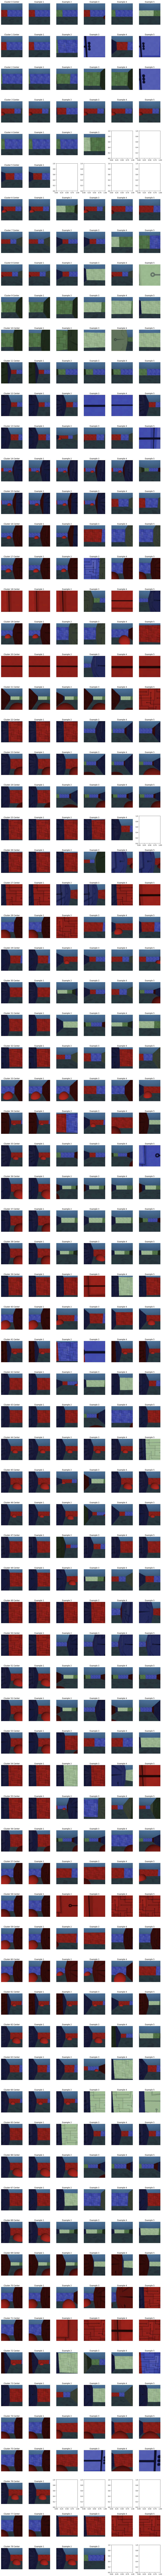

In [43]:

# Load clustering model and data
with open('../clustering_result.pkl', 'rb') as f:
    result = pickle.load(f)

clustering_model = result['clustering_model']
cluster_indices = result['cluster_indices']


# Load the saved data
data = np.load("../data/small_env_5_5_3actions_100k_low_orient.npz")

# Extract the 'image' key from the data
# Assuming the shape of 'image' is (steps, height, width, channels)
images = data["image"]

# Visualize the clusters
visualize_clusters(clustering_model, images, cluster_indices)


In [4]:
cluster_indices

array([36, 31, 36, ..., 78, 48, 78], dtype=int32)

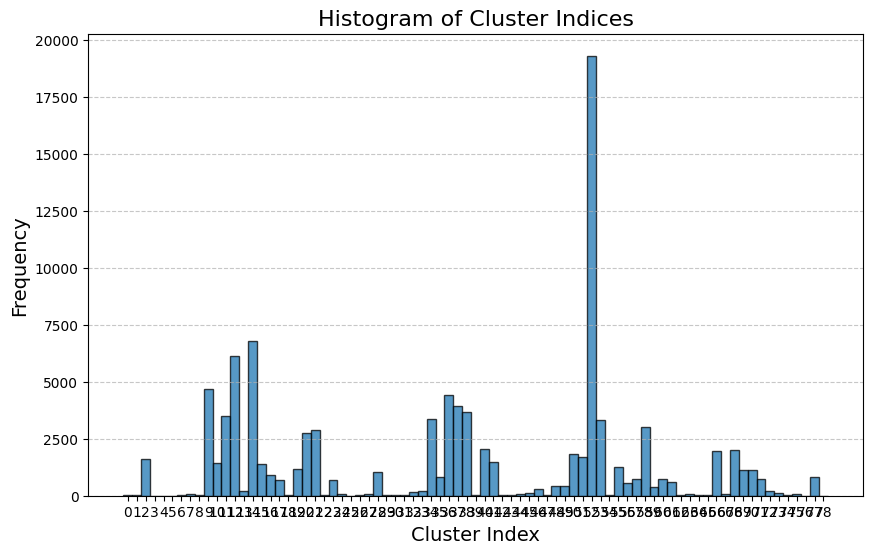

In [45]:
import numpy as np
import matplotlib.pyplot as plt


# Load clustering model and data
with open('../clustering_result.pkl', 'rb') as f:
    result = pickle.load(f)

clustering_model = result['clustering_model']
cluster_indices = np.array(result['cluster_indices'])


# Plot the histogram of cluster indices
plt.figure(figsize=(10, 6))
plt.hist(cluster_indices, bins=np.arange(cluster_indices.max() + 2) - 0.5, edgecolor='black', alpha=0.75)
plt.title("Histogram of Cluster Indices", fontsize=16)
plt.xlabel("Cluster Index", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(range(cluster_indices.max() + 1))  # Display all cluster indices
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

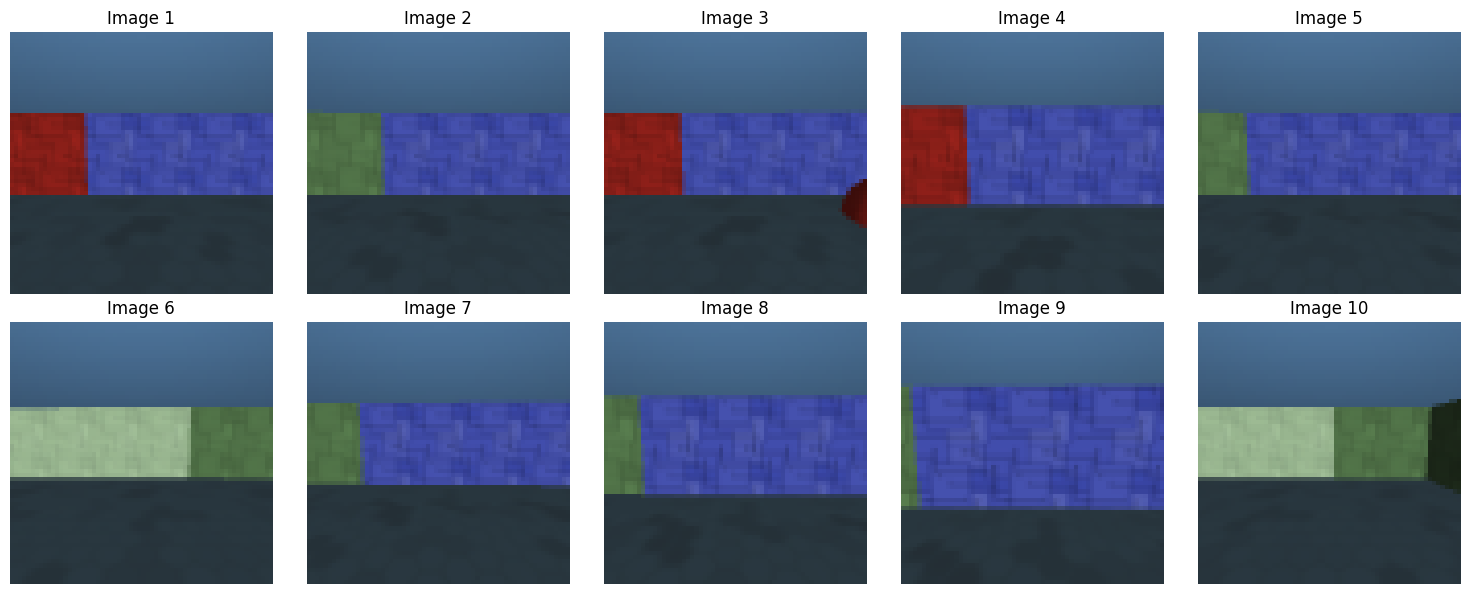

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved data
data = np.load("../data/small_env_5_5_3actions_100k_low_orient.npz")

# Extract the 'image' key from the data
images = data["image"]

# Plot the first 10 images
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
    plt.imshow(images[i], cmap='gray')  # Use 'gray' for grayscale images
    plt.title(f"Image {i+1}")
    plt.axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()

In [7]:
print([k for k in data.keys()])

['image', 'target_color', 'top_image', 'agent_pos', 'agent_dir', 'targets_vec', 'targets_pos', 'target_vec', 'target_pos', 'maze_layout', 'orientation', 'actions', 'error_values']


In [8]:
data['maze_layout'][0]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]], dtype=uint8)

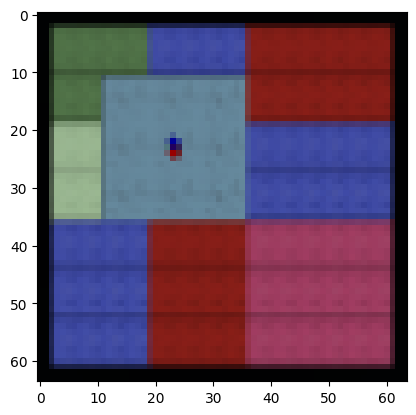

In [9]:
plt.imshow(data['top_image'][0])

In [10]:
data['agent_pos']

array([[1.5       , 3.5       ],
       [1.50013426, 3.50013875],
       [1.50027439, 3.5002784 ],
       ...,
       [1.34997716, 3.06198041],
       [1.34984309, 3.06184316],
       [1.34970795, 3.06170697]])

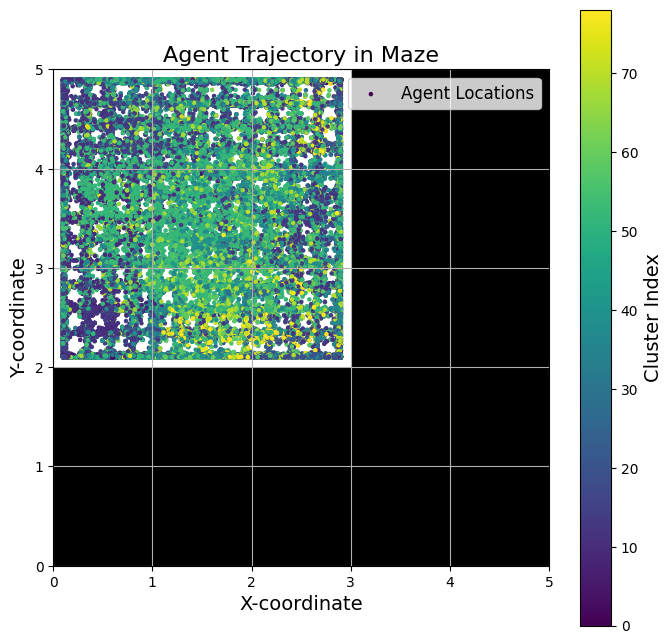

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Maze layout
maze = data['maze_layout'][0]


# Agent trajectory (sample data)
agent_locations = data['agent_pos']

# Plot the maze
plt.figure(figsize=(8, 8))
plt.imshow(maze, cmap="gray", origin="lower", extent=(0, maze.shape[1], 0, maze.shape[0]))

# Plot the agent's trajectory
# plt.plot(agent_locations[:, 0], agent_locations[:, 1], color="white", linewidth=.5, label="Agent Trajectory")
# Overlay the agent's trajectory with cluster indices as colored circles
sc = plt.scatter(agent_locations[:, 0], agent_locations[:, 1], c=cluster_indices, cmap="viridis", s=5, label="Agent Locations")

# Add a colorbar to show cluster indices
cbar = plt.colorbar(sc)
cbar.set_label("Cluster Index", fontsize=14)

# Add labels and legend
plt.title("Agent Trajectory in Maze", fontsize=16)
plt.xlabel("X-coordinate", fontsize=14)
plt.ylabel("Y-coordinate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

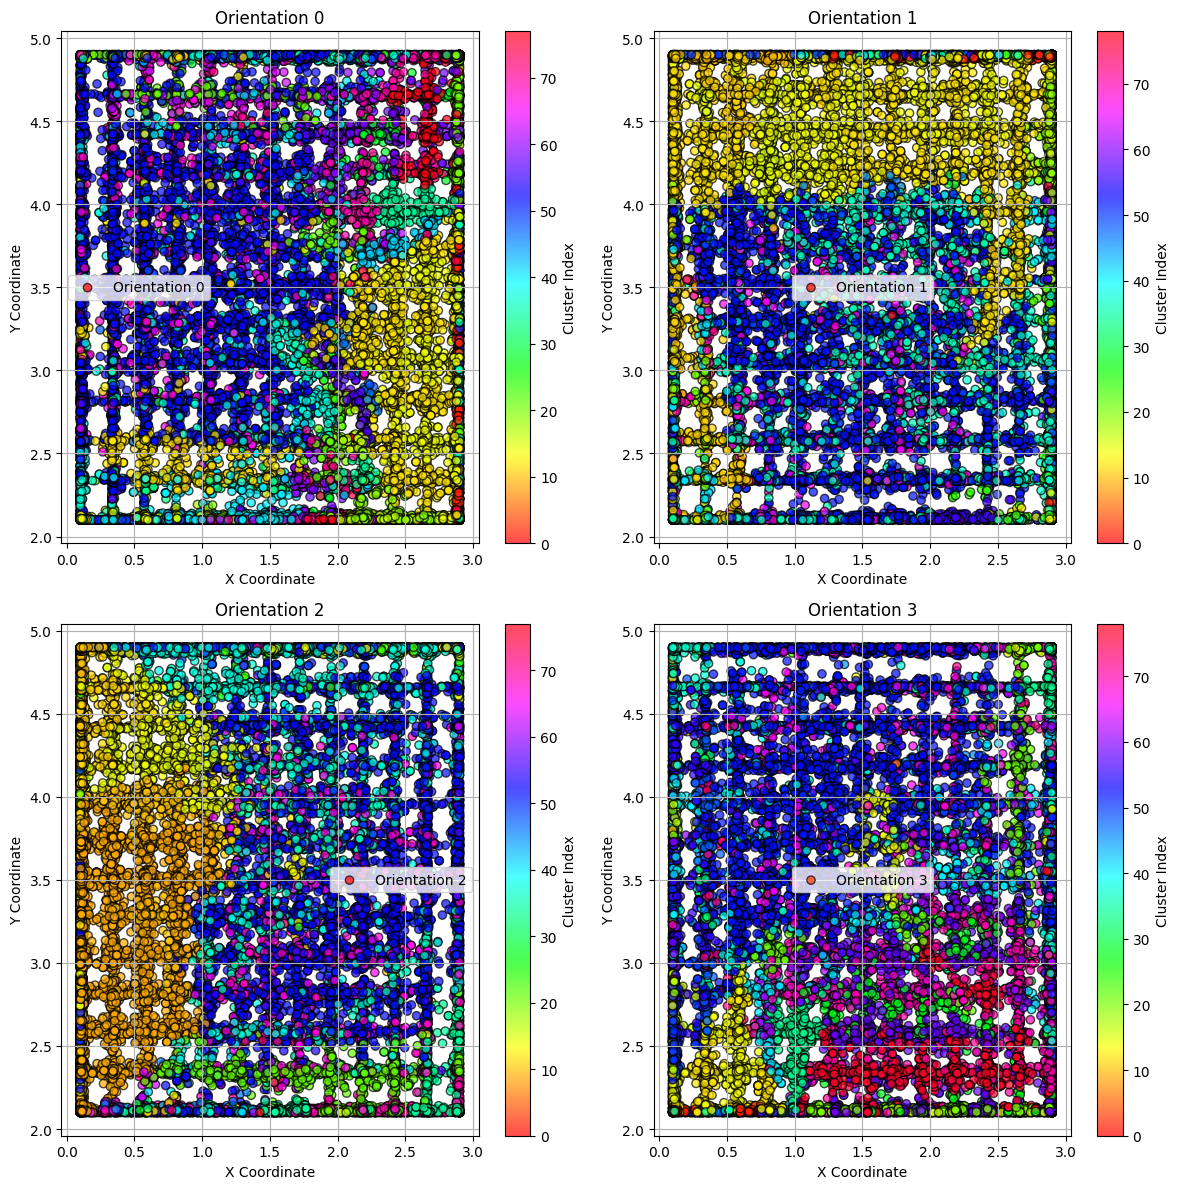

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Maze layout
maze = data['maze_layout'][0]
orient = data['orientation'] % 4


# Agent trajectory (sample data)
agent_locations = data['agent_pos']


# Create scatter plots for each orientation value
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
colors = ['red', 'blue', 'green', 'purple']  # Distinct colors for each orientation

for i in range(4):  # Orient values: 0, 1, 2, 3
    ax = axes[i]
    mask = orient == i  # Mask for the current orientation
    scatter = ax.scatter(
        agent_locations[mask, 0], 
        agent_locations[mask, 1], 
        c=cluster_indices[mask], 
        cmap='hsv', 
        label=f'Orientation {i}', 
        alpha=0.7, 
        edgecolor='k'
    )
    ax.set_title(f'Orientation {i}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.legend()
    ax.grid(True)

    # Add color bar to indicate cluster indices
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster Index')

plt.tight_layout()
plt.show()

In [49]:
unique, counts = np.unique(data['orientation'], return_counts=True)
print(unique)
print(counts)
orient = data['orientation'] %4

print(orient == 0)

[-175 -174 -173 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162
 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148
 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134
 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123 -122 -121 -120
 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109 -108 -107 -106
 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95  -94  -93  -92
  -91  -90  -89  -88  -87  -86  -85  -84  -83  -82  -81  -80  -79  -78
  -77  -76  -75  -74  -73  -72  -71  -70  -69  -68  -67  -66  -65  -64
  -63  -62  -61  -60  -59  -58  -57  -56  -55  -54  -53  -52  -51  -50
  -49  -48  -47  -46  -45  -44  -43  -42  -41  -40  -39  -38  -37  -36
  -35  -34  -33  -32  -31  -30  -29  -28  -27  -26  -25  -24  -23  -22
  -21  -20  -19  -18  -17  -16  -15  -14  -13  -12  -11  -10   -9   -8
   -7   -6   -5   -4   -3   -2   -1    0    1    2    3    4    5    6
    7    8    9   10   11   12   13   14   15   16   17   18   19   20
   21 

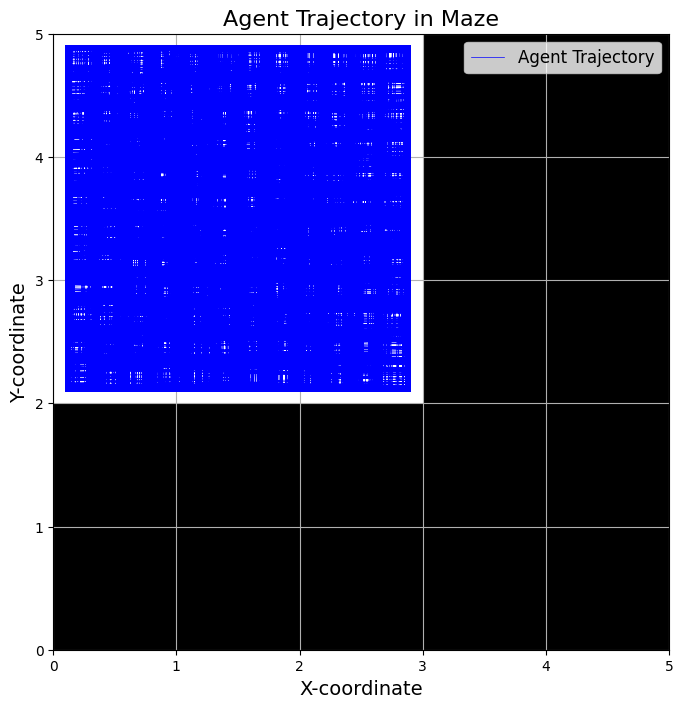

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Maze layout
maze = data['maze_layout'][0]


# Agent trajectory (sample data)
agent_locations = data['agent_pos']

# Plot the maze
plt.figure(figsize=(8, 8))
plt.imshow(maze, cmap="gray", origin="lower", extent=(0, maze.shape[1], 0, maze.shape[0]))

# Plot the agent's trajectory
plt.plot(agent_locations[:, 0], agent_locations[:, 1], color="blue", linewidth=.5, label="Agent Trajectory")
# Overlay the agent's trajectory with cluster indices as colored circles
# sc = plt.scatter(agent_locations[:, 0], agent_locations[:, 1], c=cluster_indices, cmap="viridis", s=5, label="Agent Locations")

# Add a colorbar to show cluster indices
# cbar = plt.colorbar(sc)
# cbar.set_label("Cluster Index", fontsize=14)

# Add labels and legend
plt.title("Agent Trajectory in Maze", fontsize=16)
plt.xlabel("X-coordinate", fontsize=14)
plt.ylabel("Y-coordinate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [15]:
%gui qt6

# import napari

ERROR:root:
    Could not load requested Qt binding. Please ensure that
    PyQt4 >= 4.7, PyQt5, PyQt6, PySide >= 1.0.3, PySide2, or
    PySide6 is available, and only one is imported per session.

    Currently-imported Qt library:                              None
    PyQt5 available (requires QtCore, QtGui, QtSvg, QtWidgets): False
    PyQt6 available (requires QtCore, QtGui, QtSvg, QtWidgets): False
    PySide2 installed:                                          False
    PySide6 installed:                                          False
    Tried to load:                                              ['pyqt6']
    


In [16]:
# viewer = napari.view_image(data['top_image'])

In [51]:
import sys
from pathlib import Path

# Add the parent directory to sys.path
parent_directory = Path.cwd().parent
sys.path.append(str(parent_directory))

# Import the module


In [52]:
import numpy as np
from chmm_actions import CHMM, forwardE, datagen_structured_obs_room
import matplotlib.pyplot as plt

import igraph
from matplotlib import cm, colors
import os

custom_colors = (
    np.array(
        [
            [214, 214, 214],
            [85, 35, 157],
            [253, 252, 144],
            [114, 245, 144],
            [151, 38, 20],
            [239, 142, 192],
            [214, 134, 48],
            [140, 194, 250],
            [72, 160, 162],
        ]
    )
    / 256
)
if not os.path.exists("figures"):
    os.makedirs("figures")


In [53]:
def plot_graph(
    chmm, x, a, output_file, cmap=cm.Spectral, multiple_episodes=False, vertex_size=10
):
    states = chmm.decode(x, a)[1]

    v = np.unique(states)
    if multiple_episodes:
        T = chmm.C[:, v][:, :, v][:-1, 1:, 1:]
        v = v[1:]
    else:
        T = chmm.C[:, v][:, :, v]
    A = T.sum(0)
    A /= A.sum(1, keepdims=True)

    g = igraph.Graph.Adjacency((A > 0).tolist())
    node_labels = np.arange(x.max() + 1).repeat(n_clones)[v]
    if multiple_episodes:
        node_labels -= 1
    colors = [cmap(nl)[:3] for nl in node_labels / node_labels.max()]
    out = igraph.plot(
        g,
        output_file,
        layout=g.layout("kamada_kawai"),
        vertex_color=colors,
        vertex_label=v,
        vertex_size=vertex_size,
        margin=50,
    )

    return out


def get_mess_fwd(chmm, x, pseudocount=0.0, pseudocount_E=0.0):
    n_clones = chmm.n_clones
    E = np.zeros((n_clones.sum(), len(n_clones)))
    last = 0
    for c in range(len(n_clones)):
        E[last : last + n_clones[c], c] = 1
        last += n_clones[c]
    E += pseudocount_E
    norm = E.sum(1, keepdims=True)
    norm[norm == 0] = 1
    E /= norm
    T = chmm.C + pseudocount
    norm = T.sum(2, keepdims=True)
    norm[norm == 0] = 1
    T /= norm
    T = T.mean(0, keepdims=True)
    log2_lik, mess_fwd = forwardE(
        T.transpose(0, 2, 1), E, chmm.Pi_x, chmm.n_clones, x, x * 0, store_messages=True
    )
    return mess_fwd


def place_field(mess_fwd, rc, clone):
    assert mess_fwd.shape[0] == rc.shape[0] and clone < mess_fwd.shape[1]
    field = np.zeros(rc.max(0) + 1)
    count = np.zeros(rc.max(0) + 1, int)
    for t in range(mess_fwd.shape[0]):
        r, c = rc[t]
        field[r, c] += mess_fwd[t, clone]
        count[r, c] += 1
    count[count == 0] = 1
    return field / count


In [54]:
data['actions'].shape

(100000,)

In [55]:
cluster_indices.max()

np.int64(78)

In [56]:
n_emissions = cluster_indices.max() + 1

# Calculate unique values and their counts
unique_values, counts = np.unique(cluster_indices, return_counts=True)

n_clones = np.ones(n_emissions, dtype=np.int64) * 70

x = cluster_indices.astype(np.int64)
a = data['actions'].astype(np.int64) - 1


In [57]:
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

In [61]:
n_clones[unique_values] = counts // 10 +1

In [62]:
n_clones

array([   2,    6,  160,    1,    1,    1,    3,    8,    2,  469,  146,
        352,  612,   23,  682,  138,   91,   67,    2,  120,  278,  290,
          5,   70,    7,    1,    4,    7,  105,    6,    4,    3,   15,
         22,  336,   85,  441,  396,  368,    2,  204,  147,    3,    5,
          6,   12,   30,    2,   44,   42,  183,  168, 1933,  334,    4,
        125,   56,   74,  302,   39,   75,   61,    4,    8,    5,    4,
        198,    7,  202,  112,  114,   76,   20,   12,    2,    7,    1,
         84,    1])

In [63]:
chmm = CHMM(n_clones=n_clones, pseudocount=1e-5, x=x, a=a, seed=42)

Average number of clones: 127.0506329113924


In [64]:
cluster_indices.dtype

dtype('int64')

In [ ]:
progression = chmm.learn_em_T(x, a, n_iter=10000, term_early=True)  # Training

In [ ]:
chmm.pseudocount=0.0
chmm.learn_viterbi_T(x, a, n_iter=1000)

In [ ]:
with open("../data/chmm_100k_online_clustering.pkl", "wb") as f:
    pickle.dump(chmm, f)

In [ ]:
def plot_graph_initial_position(
    chmm, x, a, output_file, cmap=cm.Spectral, multiple_episodes=False, vertex_size=10, ground_truth_positions=None
):
    states = chmm.decode(x, a)[1]

    v = np.unique(states)
    if multiple_episodes:
        T = chmm.C[:, v][:, :, v][:-1, 1:, 1:]
        v = v[1:]
    else:
        T = chmm.C[:, v][:, :, v]
    A = T.sum(0)
    A /= A.sum(1, keepdims=True)
    


    # Calculate the ground truth positions        
    # Initialize layout
    if ground_truth_positions is not None:
        # Ensure positions match the number of vertices
        assert len(ground_truth_positions) == len(states), "Mismatch between vertices and ground truth positions"
        # Initialize a dictionary to store the sum of positions and count for each state
        state_positions = {state: {'sum': np.zeros(2), 'count': 0} for state in states}

        # Iterate through the states and accumulate the positions
        for state, position in zip(states, ground_truth_positions):
            state_positions[state]['sum'] += position
            state_positions[state]['count'] += 1

        # Calculate the average position for each state
        average_positions = {state: pos['sum'] / pos['count'] if pos['count'] > 0 else np.zeros(2)
                            for state, pos in state_positions.items()}


        g = igraph.Graph.Adjacency((A > 0).tolist())
        node_labels = np.arange(x.max() + 1).repeat(n_clones)[v]
        if multiple_episodes:
            node_labels -= 1
        colors = [cmap(nl)[:3] for nl in node_labels / node_labels.max()]
        layout = [average_positions[state] for state in v]
        g.vs["x"] = [pos[0] for pos in layout]
        g.vs["y"] = [pos[1] for pos in layout]
        # Update layout using Kamada-Kawai starting from ground truth
        # Convert vertex attributes into initial layout coordinates
        layout = g.layout_kamada_kawai()
    else:
        # Default to Kamada-Kawai layout
        layout = g.layout("kamada_kawai")

    # Plot the graph
    out = igraph.plot(
        g,
        output_file,
        layout=layout,
        vertex_color=colors,
        vertex_label=v,
        vertex_size=vertex_size,
        margin=50,
    )

    return out
        

In [ ]:
graph = plot_graph_initial_position(
    chmm, x, a, output_file="figures/memory_maze_graph.pdf", cmap=cm.Reds, ground_truth_positions=data['agent_pos']
)
graph

In [34]:
n_clones = np.ones(n_emissions, dtype=np.int64) 

total = counts.sum() 
n_clones[unique_values] = (counts / total * 128 * 70).astype(np.int64) + 5

In [35]:
n_clones

array([125,  73,  13, 107, 131,  64,  82, 221,  80,  66,  71,  98, 119,
       132,  35, 108,  91,  51,  67,  44,  38, 121,  79,  70,  22, 108,
       197, 184, 141, 122,  50, 133,  54, 172,  77,  49,  83,  48,  76,
        78,  35, 122, 120,  95,  30,  46,  42, 122,  26,  51,  92,  35,
       113,  78,  65,  42, 101,  29,  55, 115,  32,  32,  63,  99,  46,
        42,  71,  63,  80,  39,  43,  65,  44,  46, 273,  30,  94,  60,
        99,  82,  84,  30,  39,  82, 103,  46, 106,  84,  19,  56,  65,
        41,  42, 133,  72,  96,  35,  90,  75,  32,  59,  53,  45,  25,
        67, 151,  39, 107,  62, 117,  88, 111,  30,  78,  33,  24,  52,
        71,  30,  24, 100,  19,  44, 144,  48,  48,  24,  21])

In [36]:
n_emissions = cluster_indices.max() + 1


x = cluster_indices.astype(np.int64)
a = data['actions'].astype(np.int64) - 1 

chmm = CHMM(n_clones=n_clones, pseudocount=2e-3, x=x, a=a, seed=42)

progression = chmm.learn_em_T(x, a, n_iter=10000, term_early=True)  # Training


Average number of clones: 74.5390625


  1%|▎                                 | 109/10000 [01:32<2:20:35,  1.17it/s, train_bps=2.3]


In [37]:
chmm.pseudocount=0.0
chmm.learn_viterbi_T(x, a, n_iter=1000)

  0%|                                      | 3/1000 [00:01<07:50,  2.12it/s, train_bps=1.49]


[np.float32(2.3130126),
 np.float32(1.4885366),
 np.float32(1.4882411),
 np.float32(1.4882411)]

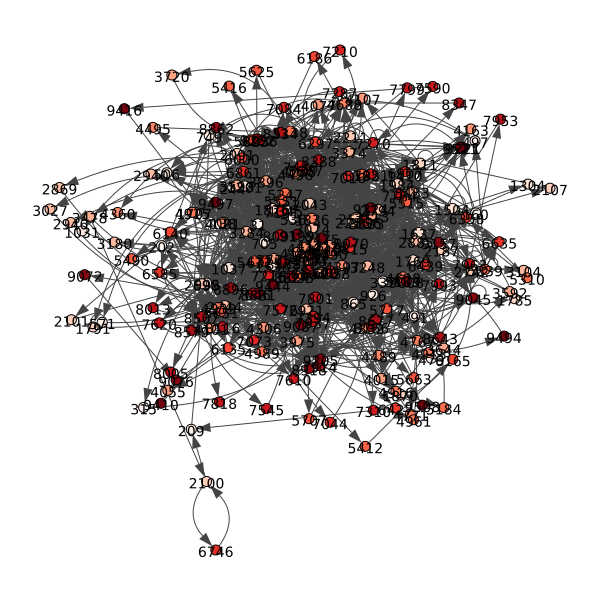

In [38]:
graph = plot_graph(
    chmm, x, a, output_file="figures/memory_maze_graph_clone_variable.pdf", cmap=cm.Reds
)
graph

In [ ]:
a